# Hackathon 2

In the first exercise, you will develop a model for estimating the cooling/heating load indexes of a building from its characteristics. These indexes serve as reference to adapt the power of air conditioning systems. In the second exercise, you will forecast the hourly electric power consumption in Spain. Electricity being not storable, predicting the electric consumption is a crucial matter for energy producers. You will develop an autoregressive model for this purpose. 

## Report content

•	You have to fill in this  jupyter notebook downloadable on the moodle website of the course

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	The deadline for submission is reported on the moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.

## Names and Noma of participants:

Part. 1: Thomas Rixen (NOMA: 14632000)

Part. 2: Théodore Cousin (NOMA: 47202000)

Part. 3: Alexandre Kneip (NOMA: 57132000)

Part. 4: Samuel Jacquet (NOMA: 6316200)

Part. 5: Dieg Troch (NOMA: 07252000)


## Regression

When designing a building, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. Architects and building designers need information about the characteristics of the building and of the conditioned space. For this reason, we  investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.
The dataset contains eight attributes (or features) and two responses (or outcomes). The aim is to use the eight features to predict each of the two responses.

Features: RelativeCompactness, SurfaceArea ,WallArea, RoofArea, OverallHeight, Orientation, GlazingArea, GlazingAreaDistribution.

Prediction: HeatingLoad, CoolingLoad



---
1) Report useful statistics for each variables (mean, std, heatmap of correlations,...)

Relative_Compactness

count    768.000000
mean       0.764167
std        0.105777
min        0.620000
25%        0.682500
50%        0.750000
75%        0.830000
max        0.980000
Name: Relative_Compactness, dtype: float64

Surface_Area

count    768.000000
mean     671.708333
std       88.086116
min      514.500000
25%      606.375000
50%      673.750000
75%      741.125000
max      808.500000
Name: Surface_Area, dtype: float64

Wall_Area

count    768.000000
mean     318.500000
std       43.626481
min      245.000000
25%      294.000000
50%      318.500000
75%      343.000000
max      416.500000
Name: Wall_Area, dtype: float64

Roof_Area

count    768.000000
mean     176.604167
std       45.165950
min      110.250000
25%      140.875000
50%      183.750000
75%      220.500000
max      220.500000
Name: Roof_Area, dtype: float64

Overall_Height

count    768.00000
mean       5.25000
std        1.75114
min        3.50000
25%        3.50000
50%        5.25000
75%        7.00000
max    

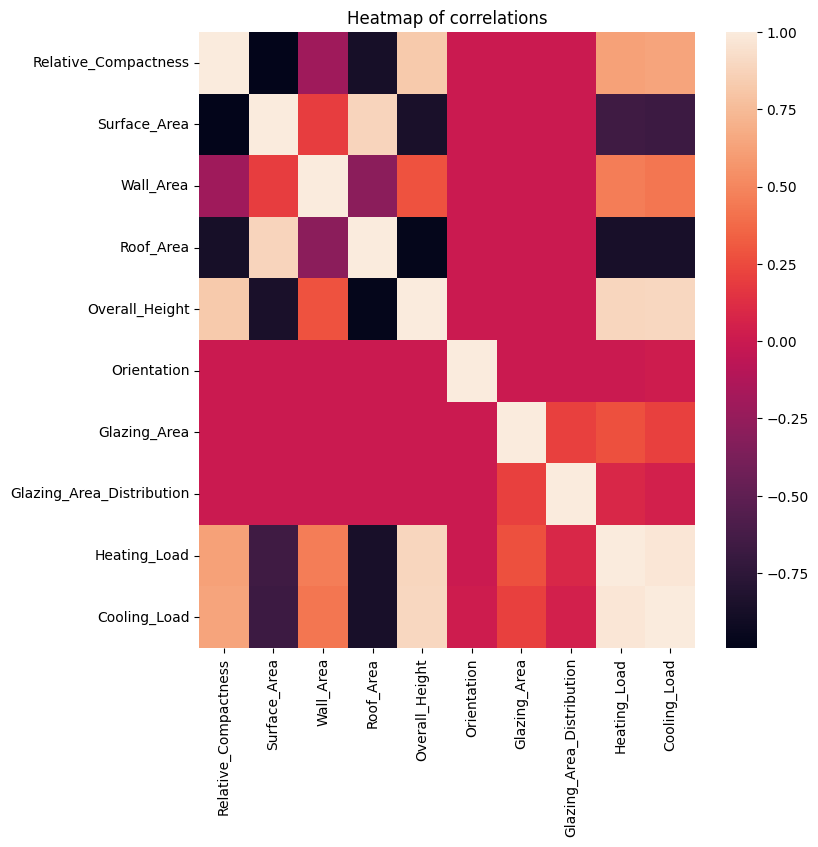

In [11]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import datetime
from tracemalloc import Statistic
import statsmodels.api as sm

df1 = pd.read_csv("Data_heating_cooling.csv", sep=",")

keys = "Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load".split(",")
statnames = "mean,std,min,25%,50%,75%,max".split(",")

statistics = df1.describe()

#print answers
for i in keys:
    print("=============================================")
    print(f"{i}\n\n{statistics[i]}")
    print("=============================================\n")


#plot
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df1.corr())
plt.title("Heatmap of correlations")
plt.show()



The heatmap of correlations reveals that heating and cooling loads are strongly correlated with overall height. In addition, these two variables are also inversely correlated with roof area.

---
2)	Add a constant term (intercept) and perform a linear regression of the variable CoolingLoad on all other explanatory variables. Use  the library statsmodels.

i. Report the F statistics and R2: interpret them. 

ii. Analyze the t-statistics and p-values of each coefficient of regression.

Are all coefficients significant at 95%? Use the library statsmodels.api. The function OLS accepts pandas dataframe (use .drop() to remove columns).


In [8]:
Y = df1["Cooling_Load"]

Orientation = df1["Orientation"]
OrientationDummies = pd.get_dummies(Orientation, prefix="O", drop_first=True)

GAD = df1["Glazing_Area_Distribution"]
GADDUmmies = pd.get_dummies(GAD, prefix="GAD", drop_first=True)

#We drop the "Surface_Area" because it is a linear combination of the "Wall_Area" and "Roof_Area" columns
#We drop the "Orientation" column because we changed it in dummy variables
#We drop the "Glazing_Area_Distribution" column because we changed it in dummy variables

#the O_3, O_4, O_5 columns are the dummy variables for the "Orientation" column
#note that O_2 = 1 when O_3 = O_4 = O_5 = 0

#the GAD_1, GAD_2, GAD_3, GAD_4, GAD_5 columns are the dummy variables for the "Glazing_Area_Distribution" column
#note that GAD_0 = 1 when GAD_1 = GAD_2 = GAD_3 = GAD_4 = GAD_5 = 0
X = df1.drop(["Surface_Area", "Orientation", "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"], axis=1)
X.insert(0, "Intercept", np.ones(len(X)), True)
X = X.join(OrientationDummies)
X= X.join(GADDUmmies)


#part 1
#computing the linear regression
f1 = sm.OLS(Y,X).fit()

#part 2

#getting the coefs, p-values and intercept
coefs = f1.summary2().tables[1]['Coef.']
p_values1 = f1.pvalues

#print answers
print("=============================================")
print('F-Statistic: ',f1.fvalue)
print('R2: ',f1.rsquared)
print("=============================================\n")

print("=============================================")
print(f"p-values:\n\n{p_values1[1:]}")
print("=============================================\n")

# #according to the course method
# x = X.to_numpy()
# y = Y.to_numpy()

# xtx = np.matmul(x.transpose(), x)
# xty = np.matmul(x.transpose(), y)
# xtxinv = np.linalg.inv(xtx)
# betaHat = np.matmul(xtxinv, xty)
# print(fii.summary2())
# print("\nvalues obtained by matrices operations:")
# for i in betaHat: print(i)

F-Statistic:  471.25771322438123
R2:  0.8904125560180346

p-values:

Relative_Compactness    3.594556e-10
Wall_Area               1.693751e-03
Roof_Area               2.167702e-06
Overall_Height          3.264746e-29
Glazing_Area            2.288119e-38
O_3                     3.680537e-01
O_4                     7.016969e-01
O_5                     2.818645e-01
GAD_1                   2.208645e-04
GAD_2                   7.143537e-04
GAD_3                   4.956160e-03
GAD_4                   6.377582e-04
GAD_5                   3.677996e-03
dtype: float64



R² is an estimator of the quality of the model. As it is close to 1, the model remains accurate when fitting the data.

Only 11 of the 14 coefficients are lower than 5%. This means that only 11 coefficients are at least 95% significant.

---
3)	Remove non-significant coefficients except the intercept (e.g. with  𝛼  5%) and run again the regression. What do you notice when you compare the R2, log-likelihood, AIC and BIC (the AIC and BIC are not explained in the course, search on internet for explanations)


In [9]:
column_headers = list(X.columns.values)
counter = 0
total = 0

string = ""

for i in range(len(p_values1)):
    if p_values1[i] <= 0.05:
        counter += 1
    else:
        string += "\n"
        X = X.drop(column_headers[i], axis='columns')
        string+=f"{column_headers[i]}"
    total+=1

print("=============================================")
print(f"Only {counter} coefficients over {total} were at least 95% significant.")
print(f"The following {total-counter} column(s) have been dropped:")
print(string)
print("=============================================\n")

#computing the linear regression
f2 = sm.OLS(Y,X).fit()

#part 2
#print answers
RES = [
    [f1.fvalue, f2.fvalue],
    [f1.rsquared, f2.rsquared], 
    [f1.llf, f2.llf],
    [f1.aic, f2.aic],
    [f1.bic, f2.bic]
    ]

d = pd.DataFrame(RES, columns = ["BEFORE", "AFTER"], index=["F-Statistic", "R2", "Log-Likelihood", "AIC", "BIC"])

print("=============================================")
print(d)
print("=============================================\n")

Only 11 coefficients over 14 were at least 95% significant.
The following 3 column(s) have been dropped:

O_3
O_4
O_5

                     BEFORE        AFTER
F-Statistic      471.257713   611.233294
R2                 0.890413     0.889800
Log-Likelihood -1970.274996 -1972.415199
AIC             3968.549993  3966.830398
BIC             4033.563049  4017.912085



According to the table printed below, 

- The F-Statistic decreased of 139,9756 units. Which means...

- R² that estimates the model quality has been slightly decreased. This could be explained by the fact that we removed several explicative variables.

- The absolute value of the log-likelihood becomes higher when we remove the useless data.

- The AIC indicator measures how well the model fits the data by penalizing the models proportionnaly to their number of arguments. In our case, even if the R² indicator has decreased, the AIC remains better for the linear regression with the parameters removed. According to the AIC, the best model is the second one.

- As the AIC, the BIC is aimed at increasing the likelihood. The lower the BIC, the better the model. As we can see, the BIC slightly decreased. This means that the models is slightly better without the lest significant variables.

To sum up, we can notice that both of the AIC and BIC indicators tell us that the linear regression is better when we remove the less significant data.


## Auto-regressive model

In a paper released early 2019, forecasting in energy markets is identified as one of the highest leverage contribution areas of Machine/Deep Learning toward transitioning to a renewable based electrical infrastructure (see https://arxiv.org/abs/1906.05433).  The file “Data_energy_load.csv” contains 4 years of electrical consumption  for Spain in MW/h.  This was retrieved from ENTSOE a public portal for Transmission Service Operator (TSO) data.

File format:

Date: dd-mm-yy, Hour : from 0 to 23. Weekday: from 1 (Monday)  to 7 (Sunday). Load: consumption in MW/h. Lm1: consumption 1h ago, Lm2: consumption 2h ago,… Lm14: consumption 14h ago

1)	Load the dataset and convert dates in datetime format (you can use the package datetime). Plot the time series of consumption, what do you observe?

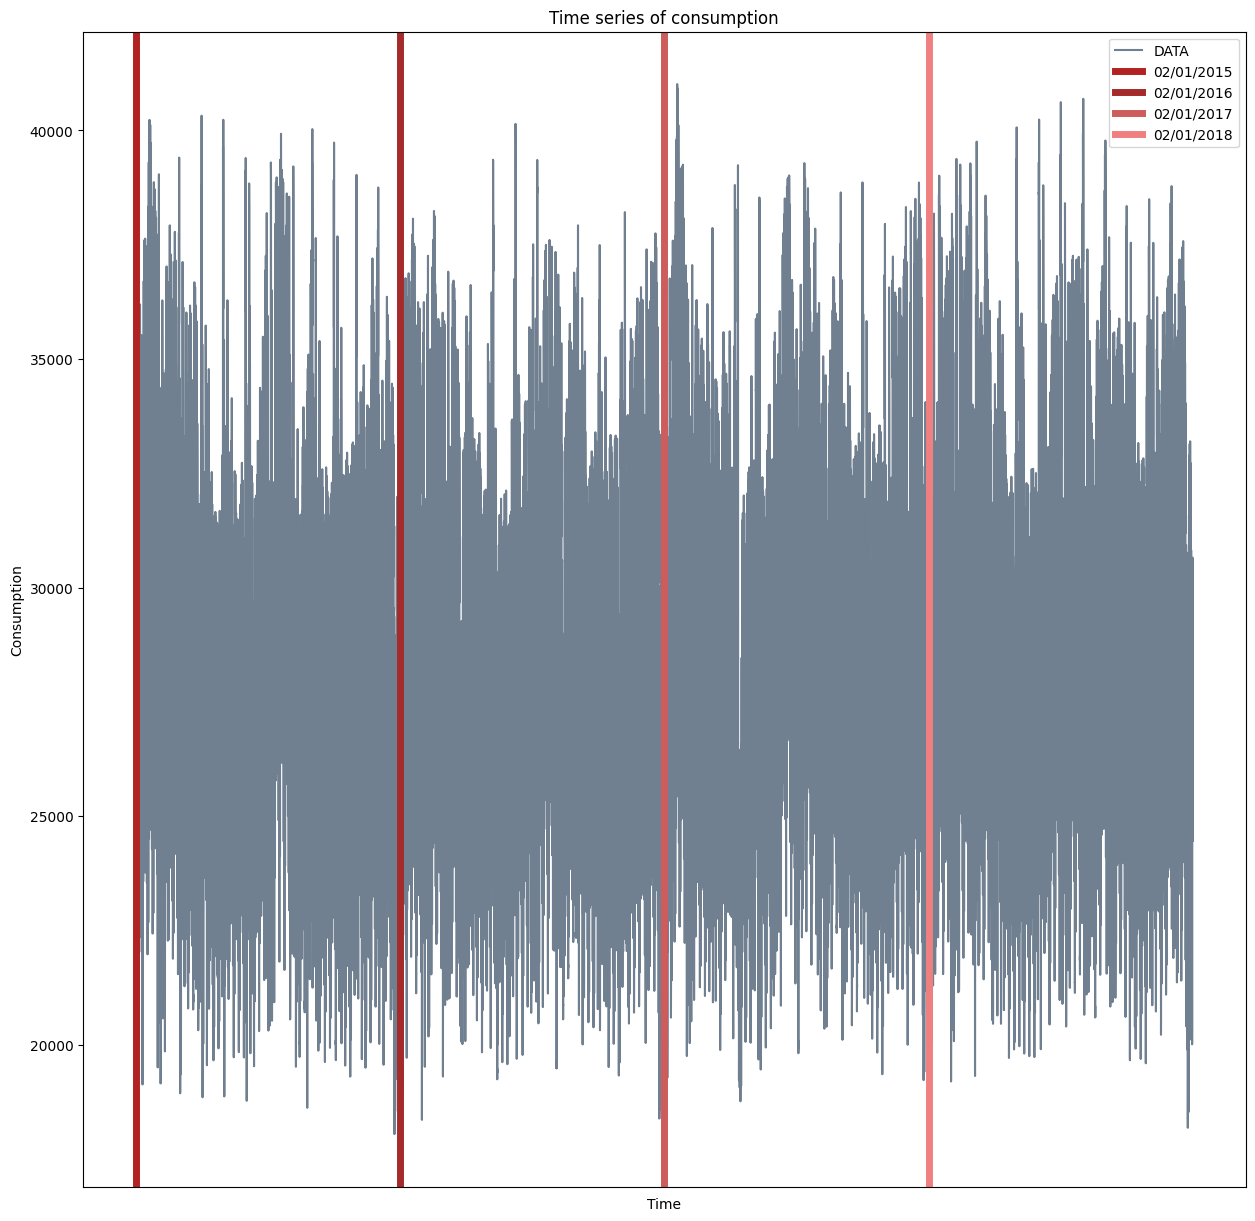

In [12]:
df2 = pd.read_csv("Data_energy_load.csv", sep=";")

#convert string format to datetime format
df2["Date"] = pd.to_datetime(df2["Date"]).to_numpy()
LOAD_DATA = np.array(df2["Load"])

#plot
fig, ax = plt.subplots(figsize=(15, 15))

plt.plot([i for i in range(len(df2["Date"]))], LOAD_DATA, color="slategrey")
plt.xlabel("Time")
plt.ylabel("Consumption")

colors = [
    "firebrick",
    "brown",
    "indianred",
    "lightcoral"
]
for i in range(4):
    plt.axvline(x = i*8760, 
    color = colors[i],
    linewidth=5
    )


ax.legend([
    "DATA", 
    "02/01/2015", 
    "02/01/2016", 
    "02/01/2017", 
    "02/01/2018"
    ])
ax.set_xticks([])
plt.title("Time series of consumption")
plt.show()

The vertical lines displayed on the graph are used to expose the winter season of each year. As can be seen, consumption is highly variable from a season to another. Moreover the consumption is significantly higher during winter than during the other seasons. 

---
2) We will regress the electric consumption (‘Load’) on the following covariates ‘Weekday’, ‘Hour’, ‘Lm1’, ‘Lm2’,…,’Lm14’. Plot the following graphs:

•	Average electric consumption per day (y axis) versus weekday (x axis)

•	Average electric consumption per hour(y axis) versus hour (x axis)

Based on these graphs, do you think that it is a good idea to regress linearly the consumption on variables ‘Hour’ and ‘Weekday’? 


            Date  Hour  Weekday     Load      Lm1      Lm2      Lm3      Lm4  \
0     2015-02-01     0        6  27070.0  26798.0  29031.0  29571.0  29014.0   
1     2015-02-01     1        6  24935.0  27070.0  26798.0  29031.0  29571.0   
2     2015-02-01     2        6  23214.0  24935.0  27070.0  26798.0  29031.0   
3     2015-02-01     3        6  22540.0  23214.0  24935.0  27070.0  26798.0   
4     2015-02-01     4        6  22096.0  22540.0  23214.0  24935.0  27070.0   
...          ...   ...      ...      ...      ...      ...      ...      ...   
35035 2018-12-31    19        2  30653.0  29592.0  26738.0  26449.0  27009.0   
35036 2018-12-31    20        2  29735.0  30653.0  29592.0  26738.0  26449.0   
35037 2018-12-31    21        2  28071.0  29735.0  30653.0  29592.0  26738.0   
35038 2018-12-31    22        2  25801.0  28071.0  29735.0  30653.0  29592.0   
35039 2018-12-31    23        2  24455.0  25801.0  28071.0  29735.0  30653.0   

           Lm5      Lm6      Lm7      L

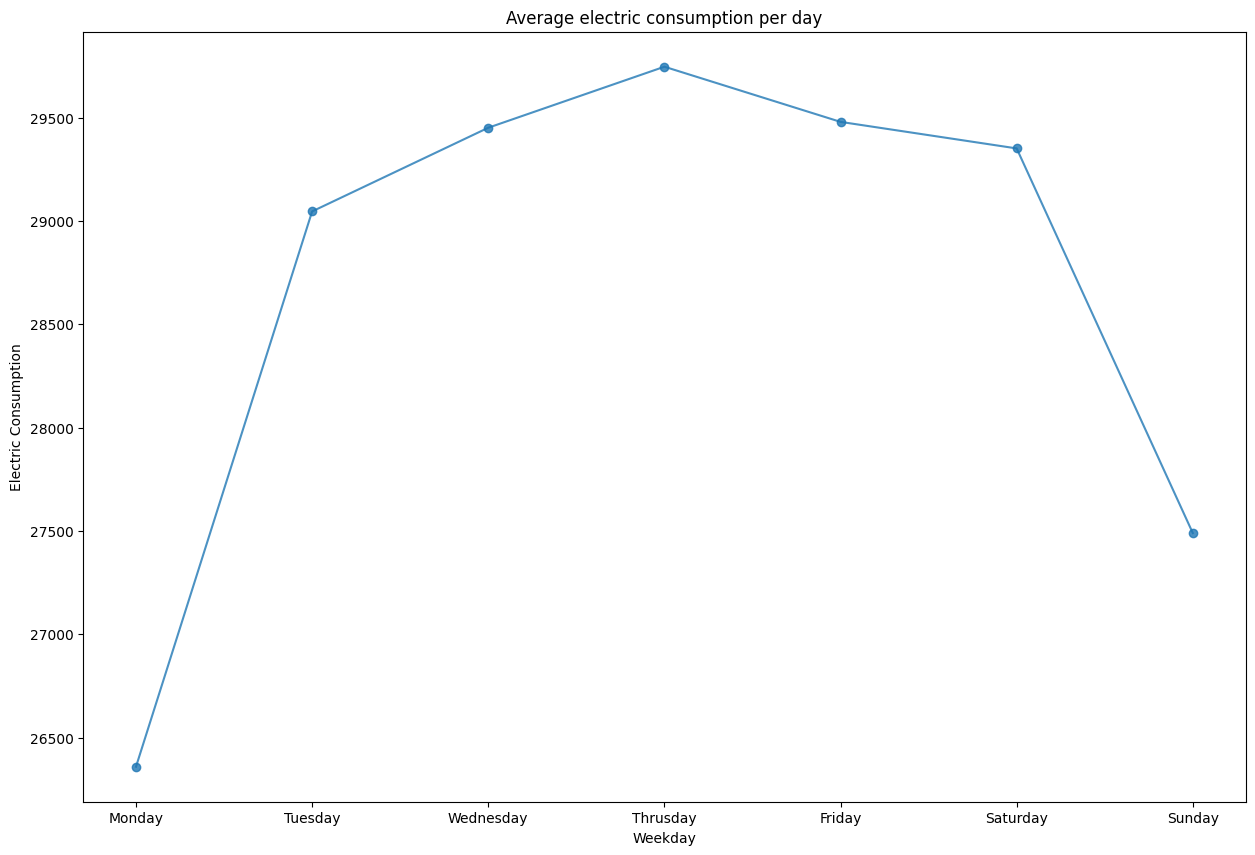

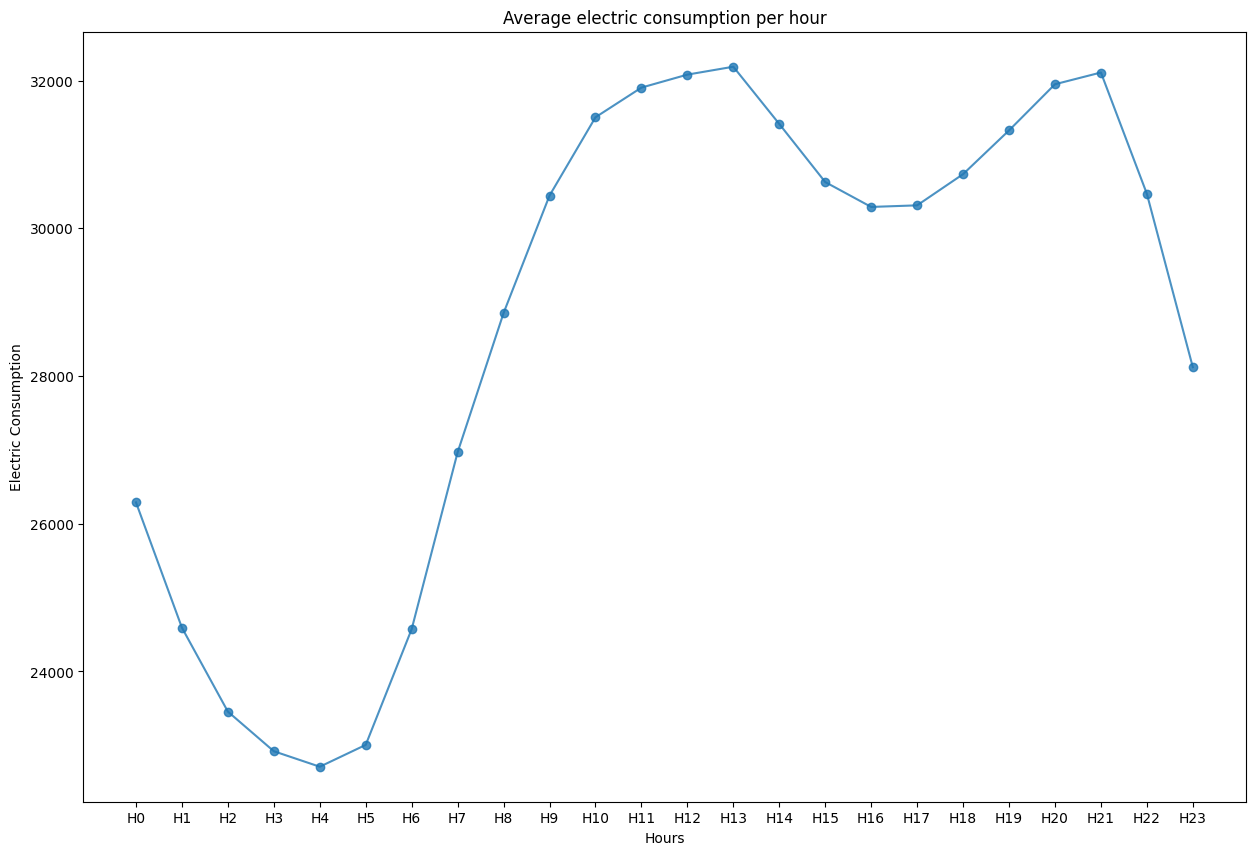

In [16]:
####################
## Sub-Question 1 ## Average electric consumption per day (y axis) versus weekday (x axis)
####################

week = []
for i in range(1,8):
    week.append(
        np.mean(np.array(df2.loc[df2["Weekday"] == i, "Load"]))
    )

#print(WeekDays)
bins1 = ["Monday", "Tuesday", "Wednesday", "Thrusday", "Friday", "Saturday", "Sunday"]
x1 = [i for i in range(1,8)]

####################
## Sub-Question 2 ## Average electric consumption per hour(y axis) versus hour (x axis)
####################

hours = []
for i in range(24):
    hours.append(
        np.mean(np.array(df2.loc[df2["Hour"] == i, "Load"]))
    )

bins2 = [f"H{i}" for i in range(24)]
x2 = [i for i in range(24)]


#plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.plot(x1, week, alpha = 0.8, marker = 'o')
plt.xlabel("Weekday")
plt.ylabel("Electric Consumption")
plt.title("Average electric consumption per day")
plt.xticks(x1, bins1)

fig2, ax2 = plt.subplots(figsize=(15, 10))
plt.plot(x2, hours, alpha=0.8, marker='o')
plt.xlabel("Hours")
plt.ylabel("Electric Consumption")
plt.title("Average electric consumption per hour")
plt.xticks(x2, bins2)
plt.show()

Comments

---
3) We will slightly transform the dataset. We first add a constant column for the regression (column of ones). You also convert the variable ‘Hour’ into 23 (and not 24!) binary variables H1,…H23. You next convert the variable ‘Weekday’ into 6 (and not 7) variables W2,…,W7. Use the command get_dummies(.) from pandas. Why do we remove H0 and W1? Why do we do this conversion?

---

In [15]:
Hour = df2["Hour"]
Hourdummies = pd.get_dummies(Hour, prefix="H", drop_first=True)

Weekday = df2["Weekday"]
Weekdaydummies = pd.get_dummies(Weekday, prefix="W", drop_first=True)

Array = df2.drop(["Hour", "Weekday"], axis=1)
Array.insert(0, "Constant", np.ones(len(Array)), True)

Array = Array.join(Hourdummies)
Array = Array.join(Weekdaydummies)

# Array is now the transformed dataset ! 
# We remove H0 and W1 because they are superfluous.
# We do this conversion because it will then be easier to do the linear regression.

Comments

---
4) Split the dataset in

•	a training set with observations from 02-01-15 up to 01-12-2018 (included)

•	a test (or validation) set with observations from 02-12-2018 up to 31-12-2018.


In [ ]:
#code here

---
If we denote by L(t) the consumption at time t, the model that we want to develop is 
$$L(t) = cst + \sum_{k=1}^{14} a_k L(t-k) +\sum_{k=2}^{7} b_k W_k + \sum_{k=1}^{23} c_k H_k    $$

o	Estimate this model with statsmodels on the training set. 

o	How would you judge the quality of the predictive model?

o	Compute the Mean Absolute Error (MAE) between predicted and real consumptions.



In [ ]:
#code here

Comments

5) Use this model on the test set to forecast the electric consumption.

o	Compare on a graph, the forecast to  real consumptions on the given period. Plot also the errors of prediction.

o	Compute the MAE on the test set and the R2. Is the forecast reliable?

In [ ]:
#code here

Comments

6) We want to check that the average consumption at 11h is significantly different (at 95%) from the average consumption at 13h. Perform a statistical test (explain which stat you use) and report the stat value, the pivot value(s) and the p-value.

In [ ]:
#code here

Comments

7) The test of question 5 requires that variances are equal. Test if this assumption holds (95% confidence level). Report  the stat value, the pivot value (s).

In [ ]:
#code here

Comments